In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt 
from sklearn.mixture import GaussianMixture

In [3]:
data = np.loadtxt("gmm_data.txt")

## Part a and b 

#### random initialization

In [4]:
# Inbuild GMM(init:random)
gmm = GaussianMixture (n_components=3, covariance_type='full', tol=0.001, init_params='random', random_state = random.seed(1))
gmm.fit(data)
weights_r = gmm.weights_
covariances_r = gmm.covariances_
means_r = gmm.means_
labels = gmm.predict(data)

In [5]:
print(labels.shape)

(3000,)


In [70]:
# Print means u1, u2, u3
for i in range(3):
    print('u%d:' %(i+1), means_r[i, :])

print('--------------------------------')
# Print standard deviations sigma1, sigma2, sigma3
for i in range(3):
    print('sigma%d:' %(i+1), np.sqrt(covariances_r[i, np.arange(5), np.arange(5)]))

u1: [-0.03730383 -0.03013253 -0.05642794 -0.04545821 -0.01454688]
u2: [0.01212874 0.038478   0.02699351 0.009984   0.04067383]
u3: [-0.03047261  0.00888572 -0.04128144 -0.02418632 -0.02550261]
--------------------------------
sigma1: [2.63263259 3.37980483 4.18318014 4.19908253 5.0330788 ]
sigma2: [2.593666   3.29523299 4.10013428 4.09134343 4.90946483]
sigma3: [2.63520156 3.37605564 4.18303773 4.18748264 5.00886108]


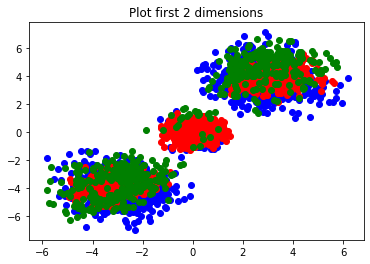

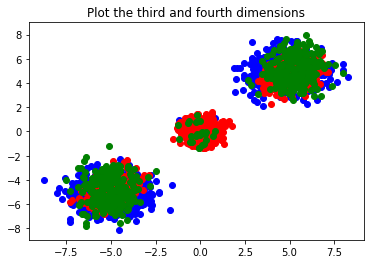

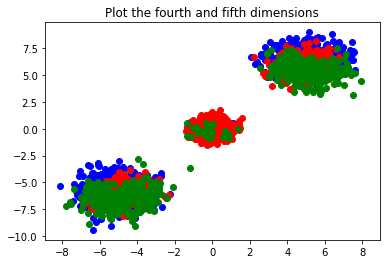

In [71]:
colors = ['blue', 'red', 'green']
# Plot first 2 dimensions
plt.figure();
for i, color in enumerate(colors):
    sub_data = data[labels == i]
    plt.scatter(sub_data[:, 0], sub_data[:, 1], color=color)
    plt.title('Plot first 2 dimensions')

# Plot the third and fourth dimensions
plt.figure();
for i, color in enumerate(colors):
    sub_data = data[labels == i]
    plt.scatter(sub_data[:, 2], sub_data[:, 3], color=color)
    plt.title('Plot the third and fourth dimensions')
    
# Plot the fourth and fifth dimensions
plt.figure();
for i, color in enumerate(colors):
    sub_data = data[labels == i]
    plt.scatter(sub_data[:, 3], sub_data[:, 4], color=color)
    plt.title('Plot the fourth and fifth dimensions')  

#### k-means initialization

In [66]:
# Inbuild GMM(init:kmeans)
gmm = GaussianMixture (n_components=3, covariance_type='full', tol=0.001, init_params='kmeans', random_state = random.seed(1))
gmm.fit(data)
weights_k = gmm.weights_
covariances_k = gmm.covariances_
means_k = gmm.means_
labels = gmm.predict(data)

In [67]:
# Print means u1, u2, u3
for i in range(3):
    print('u%d:' %(i+1), means_k[i, :])

print('--------------------------------')
# Print standard deviations sigma1, sigma2, sigma3
for i in range(3):
    print('sigma%d:' %(i+1), np.sqrt(covariances_k[i, np.arange(5), np.arange(5)]))

u1: [-3.06176428 -3.9669624  -5.02048769 -5.02021252 -6.00420335]
u2: [ 0.01052503  0.00416619  0.01356839  0.01002079 -0.02474435]
u3: [2.99520441 3.9792929  4.93552594 4.95000613 6.02926365]
--------------------------------
sigma1: [0.98899709 0.9361469  1.00583929 1.00339655 0.98832012]
sigma2: [0.4990653  0.50506796 0.48846667 0.50036388 0.48599117]
sigma3: [1.0163653  0.99140644 1.00154733 0.97653877 0.95915621]


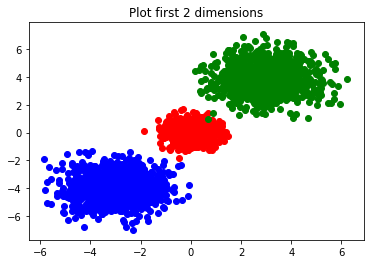

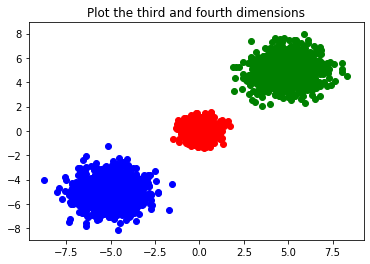

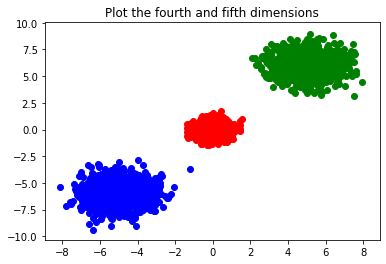

In [68]:
colors = ['blue', 'red', 'green']
# Plot first 2 dimensions
plt.figure();
for i, color in enumerate(colors):
    sub_data = data[labels == i]
    plt.scatter(sub_data[:, 0], sub_data[:, 1], color=color)
    plt.title('Plot first 2 dimensions')

# Plot the third and fourth dimensions
plt.figure();
for i, color in enumerate(colors):
    sub_data = data[labels == i]
    plt.scatter(sub_data[:, 2], sub_data[:, 3], color=color)
    plt.title('Plot the third and fourth dimensions')
    
# Plot the fourth and fifth dimensions
plt.figure();
for i, color in enumerate(colors):
    sub_data = data[labels == i]
    plt.scatter(sub_data[:, 3], sub_data[:, 4], color=color)
    plt.title('Plot the fourth and fifth dimensions')  

I find the clustering results are not good when I choose to use raondom initialization for the sklearn inbuild GMM. But when I use kmeans initialization, it works well. So I implemented my own Gaussian mixture model to figure out whether raondom initialization can work.

## My own GMM

In [37]:
class EM_MixGaussian:
    def __init__(self, data, K, MaxStep, tolerance, pre_weights=None, pre_means=None, pre_covs=None, 
                 pre_weights_flag=False, pre_means_flag=False, pre_covs_flag=False):
        
        self.data = data
        self.num_samples = self.data.shape[0]
        self.num_dim = self.data.shape[1]
        
        self.K = K
        self.MaxStep = MaxStep
        self.tolerance = tolerance
        
        self.parameters = dict()
        self.pre_weights = pre_weights
        self.pre_means = pre_means
        self.pre_covs = pre_covs
        
        self.pre_weights_flag = pre_weights_flag
        self.pre_means_flag = pre_means_flag
        self.pre_covs_flag = pre_covs_flag
      
        self.Initiate_MixGaussian()
        
    def Initiate_MixGaussian(self):
        #Initialize parameters
        parameters = dict()
        parameters['prob'] = np.random.rand(self.K)
        parameters['prob'] /= np.sum(parameters['prob'])
        
        parameters['mean'] = []
        for i in range(self.K):
            mean = np.random.rand(self.num_dim)
            parameters['mean'].append(mean)
        parameters['mean'] = np.array(parameters['mean'])
        
        parameters['cov'] = []
        for i in range(self.K):
            variance = np.random.rand(self.num_dim, self.num_dim)
            parameters['cov'].append(variance)
        parameters['cov'] = np.array(parameters['cov'])
        
        if(self.pre_weights_flag == True): 
            parameters['prob'] = self.pre_weights
        if(self.pre_means_flag == True): 
            parameters['mean'] = self.pre_means
        if(self.pre_covs_flag == True): 
            parameters['cov'] = self.pre_covs
      
        self.parameters = parameters
        
    
    def Gaussian(self, data, mean, cov):
        cov_det = np.linalg.det(cov + np.eye(self.num_dim) * 0.001)
        cov_inv = np.linalg.inv(cov + np.eye(self.num_dim) * 0.001)
        xdiff = (data - mean).reshape((-1,1))
        
        tmp = np.dot(xdiff.T, cov_inv)
        tmp = np.dot(tmp, xdiff)
        numberator = np.exp(-1/2 * tmp)
        
        tmp = np.power(2 * np.pi, self.num_dim)
        tmp = tmp * np.abs(cov_det)
        denominator = tmp ** 0.5
        prob = numberator / denominator
        
        return prob[0][0]
    
    def Updata_GMM(self):  
        for step in range(self.MaxStep):
            if(step == 0):
                postprobs = np.zeros((self.num_samples, self.K))
                for index in range(self.num_samples):
                    for i in range(self.K):
                        data = self.data[index, :]
                        mean = self.parameters['mean'][i]
                        cov = self.parameters['cov'][i]
                        postprobs[index, i] = self.parameters['prob'][i] * self.Gaussian(data, mean, cov)
               
                tmp = np.sum(postprobs, 1)
                tmp = np.log(tmp).reshape(-1)    
                old_LL = np.sum(tmp)       
                 
                tmp = np.sum(postprobs, 1).reshape((-1, 1))
                postprobs /= tmp
                
            else:
                postprobs = postprobs
                old_LL = new_LL
                
            sum_w = np.zeros((self.K, self.num_dim))
            for i in range(self.K):
                tmp = 0
                for index in range(self.num_samples):
                    tmp += postprobs[index, i] * self.data[index, :]
                tmp = tmp.reshape(self.num_dim)
                sum_w[i, :] = tmp
            
            sum_nw = np.sum(postprobs, 0).reshape(-1, 1)
            
            #Update parameters
            new_prob = (sum_nw / self.num_samples).reshape(-1)
            new_mean = (sum_w / sum_nw).reshape((self.K, self.num_dim))
            
            new_cov = np.zeros((self.K, self.num_dim, self.num_dim))
            for i in range(self.K):
                tmp = np.zeros((self.num_dim, self.num_dim))
                for index in range(self.num_samples):
                    xdiff = (self.data[index, :] - new_mean[i, :]).reshape(-1, 1)
                    tmp += postprobs[index, i] * np.dot(xdiff, xdiff.T)
                new_cov[i, :, :] = tmp / sum_nw[i, :]
            
            if(self.pre_weights_flag == False): 
                self.parameters['prob'] = new_prob
            if(self.pre_means_flag == False): 
                self.parameters['mean'] = new_mean
            if(self.pre_covs_flag == False): 
                self.parameters['cov'] = new_cov
            #self.parameters['prob'] = new_prob
            #self.parameters['mean'] = new_mean
            #self.parameters['cov'] = new_cov
            
            #Determinate whether LL converge
            for index in range(self.num_samples):
                for i in range(self.K):
                    data = self.data[index, :]
                    mean = self.parameters['mean'][i]
                    cov = self.parameters['cov'][i]
                    postprobs[index, i] = self.Gaussian(data, mean, cov)
            
            tmp = np.sum(postprobs, 1)
            tmp = np.log(tmp).reshape(-1)    
            new_LL = np.sum(tmp)       
                 
            tmp = np.sum(postprobs, 1).reshape((-1, 1))
            postprobs /= tmp
            
            if(step % 5 == 4):
                print('After', step+1, 'step, Likelihood increase:', abs(new_LL - old_LL))
            if (np.abs(new_LL - old_LL) <= self.tolerance):
                break
        
        
        assignments = np.argmax(postprobs, 1)
        return assignments

In [10]:
# Parameters
K = 3
MaxStep = 100
tolerance = 0.001

GMM = EM_MixGaussian(data, K, MaxStep, tolerance)
assignments = GMM.Updata_GMM()

After 5 step, Likelihood increase: 10.037721232365584
After 10 step, Likelihood increase: 5.422104118621064
After 15 step, Likelihood increase: 725.8853809643224


In [11]:
means_ = GMM.parameters['mean']
covariances_ = GMM.parameters['cov']
# Print means u1, u2, u3
for i in range(3):
    print('u%d:' %(i+1), means_[i, :])
    
print('--------------------------------')
# Print standard deviations sigma1, sigma2, sigma3
for i in range(3):
    print('sigma%d:' %(i+1), np.sqrt(covariances_[i, np.arange(5), np.arange(5)]))

u1: [-3.06176428 -3.9669624  -5.02048769 -5.02021252 -6.00420335]
u2: [ 0.01052503  0.00416619  0.01356839  0.01002079 -0.02474435]
u3: [2.99520441 3.9792929  4.93552594 4.95000613 6.02926365]
--------------------------------
sigma1: [0.98899659 0.93614637 1.0058388  1.00339605 0.98831962]
sigma2: [0.4990643  0.50506697 0.48846564 0.50036288 0.48599014]
sigma3: [1.01636481 0.99140594 1.00154683 0.97653826 0.95915569]


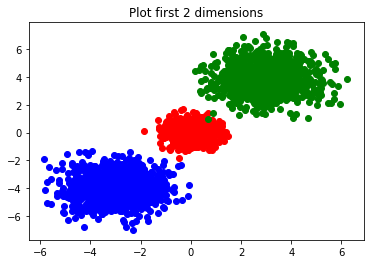

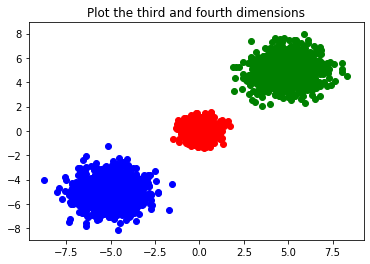

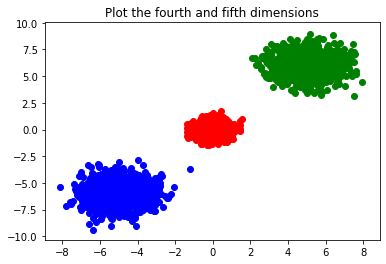

In [12]:
colors = ['blue', 'red', 'green']
# Plot first 2 dimensions
plt.figure();
for i, color in enumerate(colors):
    sub_data = data[assignments == i]
    plt.scatter(sub_data[:, 0], sub_data[:, 1], color=color)
    plt.title('Plot first 2 dimensions')

# Plot the third and fourth dimensions
plt.figure();
for i, color in enumerate(colors):
    sub_data = data[assignments == i]
    plt.scatter(sub_data[:, 2], sub_data[:, 3], color=color)
    plt.title('Plot the third and fourth dimensions')
    
# Plot the fourth and fifth dimensions
plt.figure();
for i, color in enumerate(colors):
    sub_data = data[assignments == i]
    plt.scatter(sub_data[:, 3], sub_data[:, 4], color=color)
    plt.title('Plot the fourth and fifth dimensions')  

I use random initialization for my own GMM. It can work well but its result is not stable.

## Part c

#### random initialization

In [48]:
# Assumption: known weights and covariances from inbuild GMM(random initialization)
# Parameters
GMM = EM_MixGaussian(data, K, MaxStep, tolerance, pre_weights=weights_r, pre_means=None, pre_covs=covariances_r,
                    pre_weights_flag=True, pre_means_flag=False, pre_covs_flag=True)
assignments = GMM.Updata_GMM()

After 5 step, Likelihood increase: 0.5006511834071716
After 10 step, Likelihood increase: 0.1498697769966384
After 15 step, Likelihood increase: 0.06789162756467704
After 20 step, Likelihood increase: 0.03848931737593375
After 25 step, Likelihood increase: 0.025174227223033085
After 30 step, Likelihood increase: 0.01818277002166724
After 35 step, Likelihood increase: 0.014105316731729545
After 40 step, Likelihood increase: 0.011524336608999874
After 45 step, Likelihood increase: 0.009774022470082855
After 50 step, Likelihood increase: 0.008512749784131302
After 55 step, Likelihood increase: 0.007553497376648011
After 60 step, Likelihood increase: 0.006788926693843678
After 65 step, Likelihood increase: 0.006155304017738672
After 70 step, Likelihood increase: 0.005613857672869926
After 75 step, Likelihood increase: 0.005140571724041365
After 80 step, Likelihood increase: 0.004720338049082784
After 85 step, Likelihood increase: 0.004343493485066574
After 90 step, Likelihood increase: 0.0

In [49]:
means_ = GMM.parameters['mean']
covariances_ = GMM.parameters['cov']
print('Correctness of means(random initialization)')
# Print means u1, u2, u3
for i in range(3):
    print('u%d(Estimated by my own GMM):' %(i+1), means_[i, :])
print('---------------------------------------------------------')
for i in range(3):
    print('u%d:(Estimated by inbuild GMM)' %(i+1), means_r[i, :])

Correctness of means(random initialization)
u1(Estimated by my own GMM): [-0.282661   -0.31006605 -0.38826053 -0.4389832  -0.42315444]
u2(Estimated by my own GMM): [-0.04009537  0.02051814  0.02522178  0.0761964  -0.06884056]
u3(Estimated by my own GMM): [0.26681915 0.30608986 0.29164195 0.30252705 0.49252834]
---------------------------------------------------------
u1:(Estimated by inbuild GMM) [ 0.00048147  0.01000547 -0.00256511  0.00697685  0.02008997]
u2:(Estimated by inbuild GMM) [0.00433551 0.05158607 0.01432426 0.01455453 0.05010889]
u3:(Estimated by inbuild GMM) [-0.06131878 -0.04528229 -0.08369407 -0.08238004 -0.07041958]


#### kmeans initialization

In [50]:
# Assumption: known weights and covariances from inbuild GMM(kmeans initialization)
# Parameters
GMM = EM_MixGaussian(data, K, MaxStep, tolerance, pre_weights=weights_k, pre_means=None, pre_covs=covariances_k,
                    pre_weights_flag=True, pre_means_flag=False, pre_covs_flag=True)
assignments = GMM.Updata_GMM()

In [51]:
means_ = GMM.parameters['mean']
covariances_ = GMM.parameters['cov']
print('Correctness of means(kmeans initialization)')
# Print means u1, u2, u3
for i in range(3):
    print('u%d(Estimated by my own GMM):' %(i+1), means_[i, :])
print('---------------------------------------------------------')
for i in range(3):
    print('u%d:(Estimated by inbuild GMM)' %(i+1), means_k[i, :])

Correctness of means(kmeans initialization)
u1(Estimated by my own GMM): [2.99520441 3.9792929  4.93552594 4.95000613 6.02926365]
u2(Estimated by my own GMM): [-3.06176428 -3.9669624  -5.02048769 -5.02021252 -6.00420335]
u3(Estimated by my own GMM): [ 0.01052503  0.00416619  0.01356839  0.01002079 -0.02474435]
---------------------------------------------------------
u1:(Estimated by inbuild GMM) [2.99520441 3.9792929  4.93552594 4.95000613 6.02926365]
u2:(Estimated by inbuild GMM) [-3.06176428 -3.9669624  -5.02048769 -5.02021252 -6.00420335]
u3:(Estimated by inbuild GMM) [ 0.01052503  0.00416619  0.01356839  0.01002079 -0.02474435]


## Part d

#### random initialization

In [57]:
# Assumption: known covariances from inbuild GMM(random initialization)
# Parameters
GMM = EM_MixGaussian(data, K, MaxStep, tolerance, pre_weights=None, pre_means=None, pre_covs=covariances_r,
                    pre_weights_flag=False, pre_means_flag=False, pre_covs_flag=True)
assignments = GMM.Updata_GMM()

After 5 step, Likelihood increase: 1.263365903570957
After 10 step, Likelihood increase: 0.24775152737493045
After 15 step, Likelihood increase: 0.08712815827675513
After 20 step, Likelihood increase: 0.04104191391161294
After 25 step, Likelihood increase: 0.023412796268530656
After 30 step, Likelihood increase: 0.015338996854552533
After 35 step, Likelihood increase: 0.011099893225036794
After 40 step, Likelihood increase: 0.008593016824306687
After 45 step, Likelihood increase: 0.006941052572074113
After 50 step, Likelihood increase: 0.0057455299102002755
After 55 step, Likelihood increase: 0.004815012100152671
After 60 step, Likelihood increase: 0.004053945594932884
After 65 step, Likelihood increase: 0.0034130412350350525
After 70 step, Likelihood increase: 0.0028656820140895434
After 75 step, Likelihood increase: 0.002396272790065268
After 80 step, Likelihood increase: 0.001994427395402454
After 85 step, Likelihood increase: 0.0016521298712177668
After 90 step, Likelihood increase

In [58]:
means_ = GMM.parameters['mean']
weights_ = GMM.parameters['prob']
print('Correctness of means(random initialization)')
# Print means u1, u2, u3
for i in range(3):
    print('u%d(Estimated by my own GMM):' %(i+1), means_[i, :])
print('---------------------------------------------------------')
for i in range(3):
    print('u%d:(Estimated by inbuild GMM)' %(i+1), means_r[i, :]) 

Correctness of means(kmeans initialization)
u1(Estimated by my own GMM): [0.18150465 0.04806315 0.18115857 0.10545642 0.20821676]
u2(Estimated by my own GMM): [-0.14425274 -0.14240658 -0.15520903 -0.10447146 -0.29687643]
u3(Estimated by my own GMM): [-0.0930253   0.11129644 -0.09706581 -0.06098786  0.08979769]
---------------------------------------------------------
u1:(Estimated by inbuild GMM) [ 0.00048147  0.01000547 -0.00256511  0.00697685  0.02008997]
u2:(Estimated by inbuild GMM) [0.00433551 0.05158607 0.01432426 0.01455453 0.05010889]
u3:(Estimated by inbuild GMM) [-0.06131878 -0.04528229 -0.08369407 -0.08238004 -0.07041958]


In [60]:
means_ = GMM.parameters['mean']
weights_ = GMM.parameters['prob']
print('Correctness of weights(random initialization)')
# Print means u1, u2, u3
for i in range(3):
    print('prob%d(Estimated by my own GMM):' %(i+1), weights_[i])
print('---------------------------------------------------------')
for i in range(3):
    print('prob%d:(Estimated by inbuild GMM)' %(i+1), weights_r[i])

Correctness of weights(kmeans initialization)
prob1(Estimated by my own GMM): 0.3331368863523774
prob2(Estimated by my own GMM): 0.3339818448810347
prob3(Estimated by my own GMM): 0.3328812687665882
---------------------------------------------------------
prob1:(Estimated by inbuild GMM) 0.33799081567090083
prob2:(Estimated by inbuild GMM) 0.33132006268791425
prob3:(Estimated by inbuild GMM) 0.3306891216411852


#### kmeans initialization

In [61]:
# Assumption: known weights and covariances from inbuild GMM(kmeans initialization)
# Parameters
GMM = EM_MixGaussian(data, K, MaxStep, tolerance, pre_weights=None, pre_means=None, pre_covs=covariances_k,
                    pre_weights_flag=False, pre_means_flag=False, pre_covs_flag=True)
assignments = GMM.Updata_GMM()

In [62]:
means_ = GMM.parameters['mean']
weights_ = GMM.parameters['prob']
print('Correctness of means(kmeans initialization)')
# Print means u1, u2, u3
for i in range(3):
    print('u%d(Estimated by my own GMM):' %(i+1), means_[i, :])
print('---------------------------------------------------------')
for i in range(3):
    print('u%d:(Estimated by inbuild GMM)' %(i+1), means_k[i, :]) 

Correctness of means(kmeans initialization)
u1(Estimated by my own GMM): [2.99520441 3.9792929  4.93552594 4.95000613 6.02926365]
u2(Estimated by my own GMM): [-3.06176428 -3.9669624  -5.02048769 -5.02021252 -6.00420335]
u3(Estimated by my own GMM): [ 0.01052503  0.00416619  0.01356839  0.01002079 -0.02474435]
---------------------------------------------------------
u1:(Estimated by inbuild GMM) [2.99520441 3.9792929  4.93552594 4.95000613 6.02926365]
u2:(Estimated by inbuild GMM) [-3.06176428 -3.9669624  -5.02048769 -5.02021252 -6.00420335]
u3:(Estimated by inbuild GMM) [ 0.01052503  0.00416619  0.01356839  0.01002079 -0.02474435]


In [63]:
means_ = GMM.parameters['mean']
weights_ = GMM.parameters['prob']
print('Correctness of weights(kmeans initialization)')
# Print means u1, u2, u3
for i in range(3):
    print('prob%d(Estimated by my own GMM):' %(i+1), weights_[i])
print('---------------------------------------------------------')
for i in range(3):
    print('prob%d:(Estimated by inbuild GMM)' %(i+1), weights_k[i])

Correctness of weights(kmeans initialization)
prob1(Estimated by my own GMM): 0.3333333333333333
prob2(Estimated by my own GMM): 0.3333333333333333
prob3(Estimated by my own GMM): 0.3333333333333333
---------------------------------------------------------
prob1:(Estimated by inbuild GMM) 0.3333333333333333
prob2:(Estimated by inbuild GMM) 0.3333333333333333
prob3:(Estimated by inbuild GMM) 0.3333333333333333
